In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, TimeDistributed
from tensorflow.keras.optimizers import Adam

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Abhin\anaconda3\envs\Omdena\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_train = pd.read_csv('C:/Users/Abhin/algeriabhopal_watermanagementandforecasting/src/data/final/Final Algeria Datasets/train_algiers.csv')
df_test = pd.read_csv('C:/Users/Abhin/algeriabhopal_watermanagementandforecasting/src/data/final/Final Algeria Datasets/test_algiers.csv')

In [3]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train['day'] = df_train['date'].dt.day
df_train['month'] = df_train['date'].dt.month
df_train['year'] = df_train['date'].dt.year
df_train = df_train.drop(columns=['date'])


df_test['date'] = pd.to_datetime(df_test['date'])
df_test['day'] = df_test['date'].dt.day
df_test['month'] = df_test['date'].dt.month
df_test['year'] = df_test['date'].dt.year
df_test = df_test.drop(columns=['date'])

In [4]:
target = df_train['water_availability']

In [5]:
target_index = df_train.columns.get_loc('water_availability')
target_index

31

In [6]:
df_train.shape

(2450, 35)

In [7]:
df_train.head()

,precipitation_sum (mm),temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,water_availability,day,month,year
0,0.0,11.984259,0.007020,79.653691,-1.008622,-1.247756,11.792043,0.000000,0.023497,290.359024,...,238.455282,4.762528,0.0,217.475818,0.000013,935.769155,-200.341947,1,4,2015
1,0.0,12.426162,0.006639,73.369087,-0.882894,-0.674852,10.580860,0.000000,0.032284,288.967108,...,236.761384,4.734760,0.0,214.612400,0.000010,933.421715,-173.229781,2,4,2015
2,0.0,13.183237,0.007103,73.648926,-0.554821,-0.975509,13.224449,0.000000,0.021108,289.621761,...,235.312021,4.710264,0.0,215.533733,0.000011,931.213284,-175.856488,3,4,2015
3,0.0,12.117507,0.006628,74.249417,-0.762048,-1.315288,11.899657,0.000000,0.022526,289.779312,...,234.026542,4.696759,0.0,202.458474,0.000009,929.092368,-164.456208,4,4,2015
4,0.0,11.775280,0.006604,75.414558,-1.970064,-1.730378,13.397951,0.015292,0.027819,289.759368,...,232.774424,4.638155,0.0,222.788846,0.000011,926.930220,-186.252044,5,4,2015


In [8]:
df_train

,precipitation_sum (mm),temperature_2m_above_ground,specific_humidity_2m_above_ground,relative_humidity_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,precipitable_water_entire_atmosphere,total_precipitation_surface,ACond_tavg,AvgSurfT_tavg,...,SoilMoist_RZ_tavg,SoilMoist_S_tavg,SWE_tavg,Swnet_tavg,TVeg_tavg,TWS_tavg,water_availability,day,month,year
0,0.0,11.984259,0.007020,79.653691,-1.008622,-1.247756,11.792043,0.000000,0.023497,290.359024,...,238.455282,4.762528,0.0,217.475818,0.000013,935.769155,-200.341947,1,4,2015
1,0.0,12.426162,0.006639,73.369087,-0.882894,-0.674852,10.580860,0.000000,0.032284,288.967108,...,236.761384,4.734760,0.0,214.612400,0.000010,933.421715,-173.229781,2,4,2015
2,0.0,13.183237,0.007103,73.648926,-0.554821,-0.975509,13.224449,0.000000,0.021108,289.621761,...,235.312021,4.710264,0.0,215.533733,0.000011,931.213284,-175.856488,3,4,2015
3,0.0,12.117507,0.006628,74.249417,-0.762048,-1.315288,11.899657,0.000000,0.022526,289.779312,...,234.026542,4.696759,0.0,202.458474,0.000009,929.092368,-164.456208,4,4,2015
4,0.0,11.775280,0.006604,75.414558,-1.970064,-1.730378,13.397951,0.015292,0.027819,289.759368,...,232.774424,4.638155,0.0,222.788846,0.000011,926.930220,-186.252044,5,4,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,0.4,16.287671,0.007353,64.745201,1.852457,0.836797,16.381304,0.087708,0.042153,289.566125,...,232.290232,4.644942,0.0,51.195616,0.000002,908.139406,-141.918384,26,12,2021
2446,0.0,15.364401,0.007059,65.617104,1.496906,0.156879,14.250724,0.231606,0.050204,290.714109,...,231.410801,4.632657,0.0,79.304834,0.000003,906.386631,-163.010434,27,12,2021
2447,0.0,15.230325,0.006617,62.344394,0.348704,0.345577,13.050149,0.273704,0.048286,289.951823,...,230.570851,4.630495,0.0,89.754350,0.000003,904.640572,-151.027623,28,12,2021
2448,0.0,15.254436,0.006148,58.465583,0.088050,0.232945,12.067519,0.432374,0.020123,288.470871,...,229.897395,4.631897,0.0,94.172944,0.000003,903.028228,-142.100086,29,12,2021


## Normalizing the features

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df_train)
test_scaled = scaler.transform(df_test)

## Function to create a dataset for CNN-LSTM

In [10]:
def create_dataset(dataset, look_back=5):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        X.append(a)
        y.append(dataset[i + look_back, 31])
    return np.array(X), np.array(y)

In [11]:
look_back = 5  # Number of previous time steps to consider for each prediction
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

## Reshape input to be [samples, time steps, features]

In [12]:
# We can adjust the number of features based on our dataset
features = train_scaled.shape[1]
X_train = X_train.reshape((X_train.shape[0], look_back, features))
X_test = X_test.reshape((X_test.shape[0], look_back, features))

# CNN-LSTM model

In [13]:
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(look_back, features, 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

## Compiling the model

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## Training the model

In [15]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
77/77 [==============================] - 6s 44ms/step - loss: 0.0072 - val_loss: 0.0053
Epoch 2/100
77/77 [==============================] - 2s 29ms/step - loss: 0.0065 - val_loss: 0.0051
Epoch 3/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 4/100
77/77 [==============================] - 2s 22ms/step - loss: 0.0062 - val_loss: 0.0064
Epoch 5/100
77/77 [==============================] - 2s 26ms/step - loss: 0.0061 - val_loss: 0.0055
Epoch 6/100
77/77 [==============================] - 2s 25ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 7/100
77/77 [==============================] - 2s 28ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 8/100
77/77 [==============================] - 2s 24ms/step - loss: 0.0057 - val_loss: 0.0050
Epoch 9/100
77/77 [==============================] - 2s 29ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 10/100
77/77 [==============================] - 2s 27ms/step - loss: 0.0058 - val_loss: 0.0052

## Making predictions using the trained model

In [16]:
y_pred = model.predict(X_test)

17/17 [==============================] - 1s 9ms/step


### Mean Squared Error (MSE)

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

### Root Mean Squared Error (RMSE)

In [18]:
import math
rmse = math.sqrt(mse)

### Mean Absolute Error (MAE)

In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [20]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.00938421370645384
Root Mean Squared Error (RMSE): 0.09687215134626587
Mean Absolute Error (MAE): 0.05796405057098061


## Scater Plot of Actual Vs. Predicted values

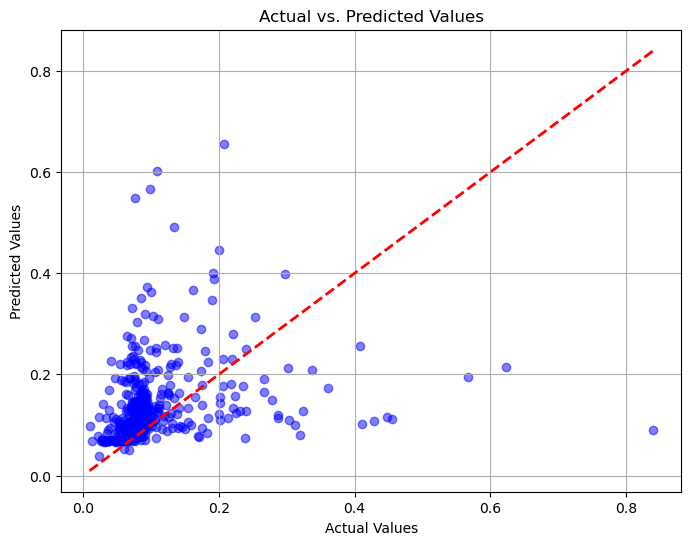

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

# Show the plot
plt.show()

## Line plot for Actual Vs. Predicted values

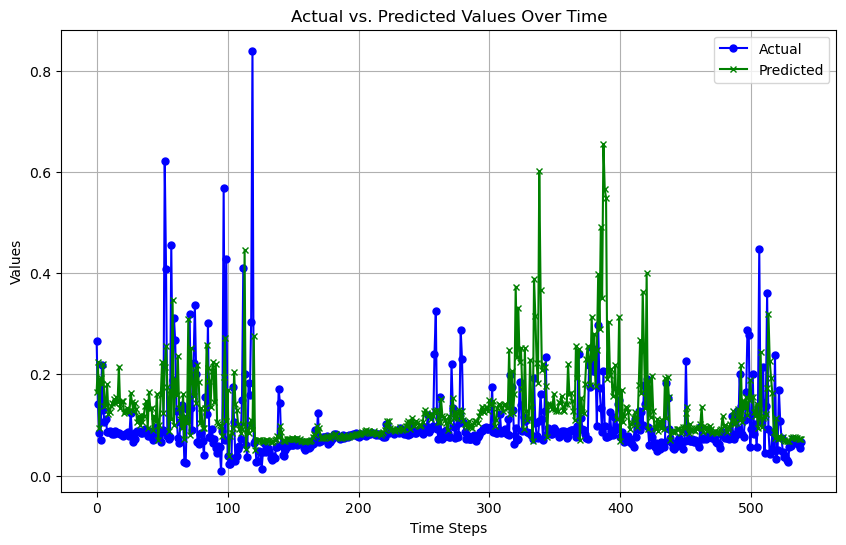

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array for the time steps (assuming sequential data)
time_steps = np.arange(len(y_test))

# Create a line plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_steps, y_test, label='Actual', linestyle='-', marker='o', markersize=5, color='blue')
plt.plot(time_steps, y_pred, label='Predicted', linestyle='-', marker='x', markersize=5, color='green')
plt.title('Actual vs. Predicted Values Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()